# Trinome
BENCHEIKH Abdelkarim <br>
LOUAIFI Azouaou <br>
SAHNOUNE Yacine

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
np.set_printoptions(threshold=10000, suppress=True)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("credit_scoring.csv", sep=";")
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [3]:
data['Status']

0       1
1       1
2       0
3       1
4       1
       ..
4370    0
4371    1
4372    0
4373    1
4374    1
Name: Status, Length: 4375, dtype: int64

# Visualisation de la distribution de la variable target

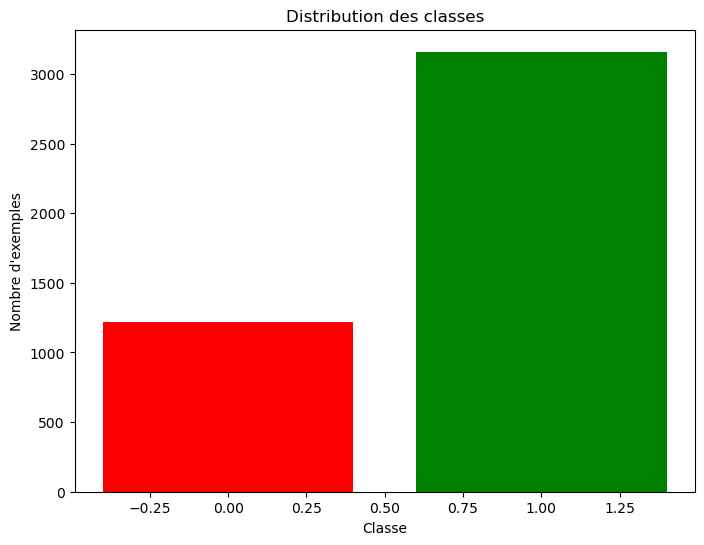

In [85]:
plt.figure(figsize=(8, 6))
values_count = data['Status'].value_counts()
plt.bar(values_count.index, values_count.values, 
        color=['green', 'red'])

plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'exemples')
plt.show()

In [4]:
df = data.values
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X.shape

(4375, 13)

# Séparation du dataset en set d'entrainement et set de test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state = 1)

# Modèles d'apprentissage
<ul>
    <li>KNN avec k=5</li>
    <li>MLP a deux couches 40, 20</li>
    <li>CART</li>
</ul>

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

tree_clf = DecisionTreeClassifier(random_state = 1)
tree_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)

mlp_clf1 = MLPClassifier(hidden_layer_sizes = (40, 20), random_state = 1)
mlp_clf1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)

# CART

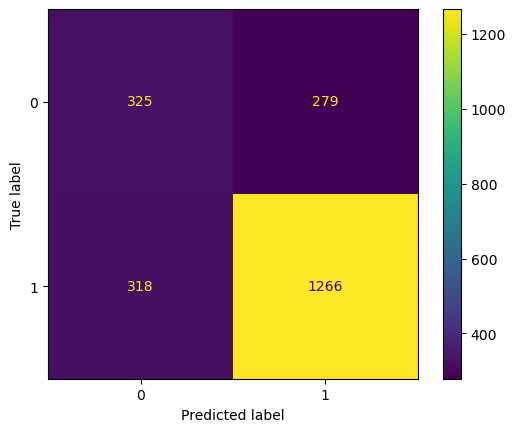

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score

y_pred_tree = tree_clf.predict(X_test)

cart_precision = precision_score(y_pred = y_pred_tree, y_true = y_test)
cart_accuracy = accuracy_score(y_pred = y_pred_tree, y_true = y_test)
cart_recall = recall_score(y_pred = y_pred_tree, y_true = y_test)

cm = confusion_matrix(y_test, y_pred_tree)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

# KNN

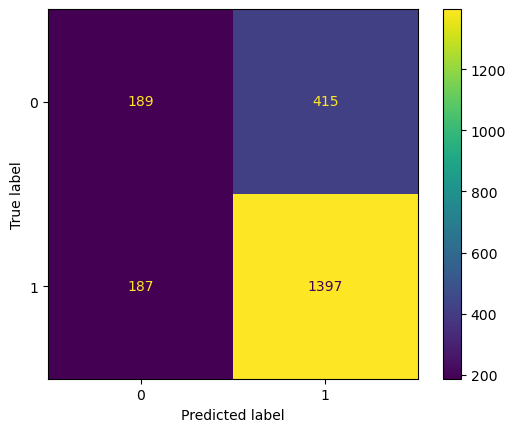

In [10]:
y_pred_knn = knn_clf.predict(X_test)

knn_precision = precision_score(y_pred = y_pred_knn, y_true = y_test)
knn_accuracy = accuracy_score(y_pred = y_pred_knn, y_true = y_test)
knn_recall = recall_score(y_pred = y_pred_knn, y_true = y_test)

cm = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

# MLP

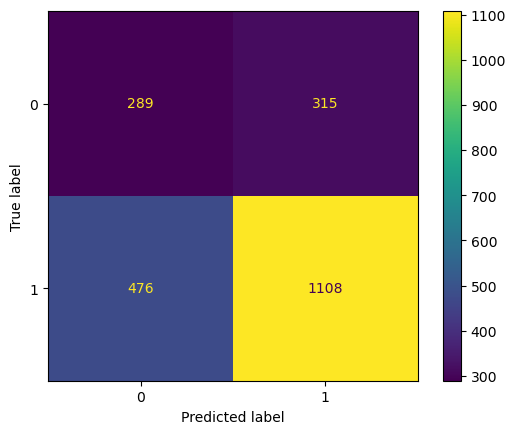

In [11]:
y_pred_mlp1 = mlp_clf1.predict(X_test)

mlp1_precision = precision_score(y_pred = y_pred_mlp1, y_true = y_test)
mlp1_accuracy = accuracy_score(y_pred = y_pred_mlp1, y_true = y_test)
mlp1_recall = recall_score(y_pred = y_pred_mlp1, y_true = y_test)

cm = confusion_matrix(y_test, y_pred_mlp1)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

# De par le contexte du dataset il nous semble plus logique de prendre en compte <b>l'accuracy</b> comme mesure vu que l'on va apporter une plus grand importance au vrai positifs dans notre set.

In [12]:
print("CART")
print("-"*20)
print(f"Précision: {cart_precision * 100:.2f}%")
print(f"Accuracy: {cart_accuracy * 100:.2f}%")
print(f"Rappel: {cart_recall * 100:.2f}%")
print("-"*20)

print("KNN")
print("-"*20)
print(f"Précision: {knn_precision * 100:.2f}%")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Rappel: {knn_recall * 100:.2f}%")
print("-"*20)

print("MLP1")
print("-"*20)
print(f"Précision: {mlp1_precision * 100:.2f}%")
print(f"Accuracy: {mlp1_accuracy * 100:.2f}%")
print(f"Rappel: {mlp1_recall * 100:.2f}%")
print("-"*20)

CART
--------------------
Précision: 81.94%
Accuracy: 72.71%
Rappel: 79.92%
--------------------
KNN
--------------------
Précision: 77.10%
Accuracy: 72.49%
Rappel: 88.19%
--------------------
MLP1
--------------------
Précision: 77.86%
Accuracy: 63.85%
Rappel: 69.95%
--------------------


# Normalisation des variables

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaler.fit(X_test)
scaled_X_test = scaler.transform(X_test)

In [14]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(40, 20), random_state = 1)
mlp_clf2.fit(scaled_X_train, y_train)
y_pred_mlp2 = mlp_clf2.predict(scaled_X_test)

mlp2_precision = precision_score(y_pred = y_pred_mlp2, y_true = y_test)
mlp2_accuracy = accuracy_score(y_pred = y_pred_mlp2, y_true = y_test)
mlp2_recall = recall_score(y_pred = y_pred_mlp2, y_true = y_test)

In [15]:
knn_clf2 = KNeighborsClassifier(n_neighbors = 5)
knn_clf2.fit(scaled_X_train, y_train)
y_pred_knn2 = knn_clf2.predict(scaled_X_test)

knn2_precision = precision_score(y_pred = y_pred_knn2, y_true = y_test)
knn2_accuracy = accuracy_score(y_pred = y_pred_knn2, y_true = y_test)
knn2_recall = recall_score(y_pred = y_pred_knn2, y_true = y_test)

In [16]:
cart_clf2 = DecisionTreeClassifier(random_state = 1)
cart_clf2.fit(scaled_X_train, y_train)
y_pred_cart2 = cart_clf2.predict(scaled_X_test)

cart2_precision = precision_score(y_pred = y_pred_cart2, y_true = y_test)
cart2_accuracy = accuracy_score(y_pred = y_pred_cart2, y_true = y_test)
cart2_recall = recall_score(y_pred = y_pred_cart2, y_true = y_test)

In [17]:
print("CART Sans normalisation")
print("-"*20)
print(f"Précision: {cart_precision * 100:.2f}%")
print(f"Accuracy: {cart_accuracy * 100:.2f}%")
print(f"Rappel: {cart_recall * 100:.2f}%")
print("-"*20)

print("CART Avec normalisation")
print("-"*20)
print(f"Précision: {cart2_precision * 100:.2f}%")
print(f"Accuracy: {cart2_accuracy * 100:.2f}%")
print(f"Rappel: {cart2_recall * 100:.2f}%")
print("-"*20)

CART Sans normalisation
--------------------
Précision: 81.94%
Accuracy: 72.71%
Rappel: 79.92%
--------------------
CART Avec normalisation
--------------------
Précision: 81.83%
Accuracy: 71.80%
Rappel: 78.47%
--------------------


In [18]:
print("KNN Sans normalisation")
print("-"*20)
print(f"Précision: {knn_precision * 100:.2f}%")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Rappel: {knn_recall * 100:.2f}%")
print("-"*20)

print("KNN Avec normalisation")
print("-"*20)
print(f"Précision: {knn2_precision * 100:.2f}%")
print(f"Accuracy: {knn2_accuracy * 100:.2f}%")
print(f"Rappel: {knn2_recall * 100:.2f}%")
print("-"*20)

KNN Sans normalisation
--------------------
Précision: 77.10%
Accuracy: 72.49%
Rappel: 88.19%
--------------------
KNN Avec normalisation
--------------------
Précision: 80.87%
Accuracy: 74.95%
Rappel: 85.67%
--------------------


In [19]:
print("MLP Sans normalisation")
print("-"*20)
print(f"Précision: {mlp1_precision * 100:.2f}%")
print(f"Accuracy: {mlp1_accuracy * 100:.2f}%")
print(f"Rappel: {mlp1_recall * 100:.2f}%")
print("-"*20)

print("MLP Avec normalisation")
print("-"*20)
print(f"Précision: {mlp2_precision * 100:.2f}%")
print(f"Accuracy: {mlp2_accuracy * 100:.2f}%")
print(f"Rappel: {mlp2_recall * 100:.2f}%")
print("-"*20)

MLP Sans normalisation
--------------------
Précision: 77.86%
Accuracy: 63.85%
Rappel: 69.95%
--------------------
MLP Avec normalisation
--------------------
Précision: 83.86%
Accuracy: 77.65%
Rappel: 85.61%
--------------------


# Après normalisation le modèle qui nous semble le plus adapté est le <b>MLP</b> car il affiche le meilleur score d'<b>accuracy</b> entre les trois. Nous continuerons donc avec ce dernier pour le reste.
<p>On remarque aussi que la normalisation a grandement aidé à augmenter les métriques en particulier celle qui nous intéresse qui est l'accuracy. On utilisera donc le dataset normalisé<p>

# Sélection des variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


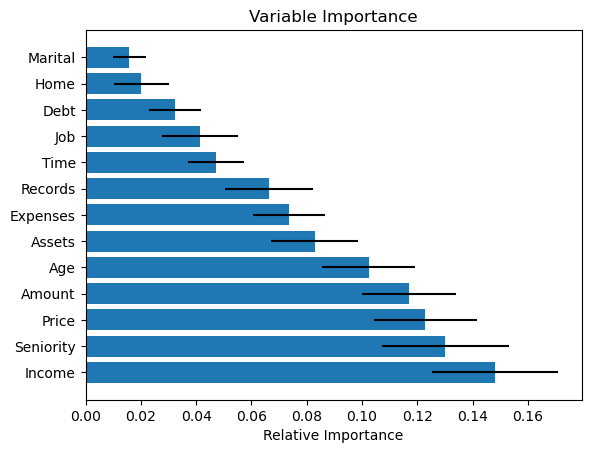

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_clf.fit(scaled_X_train, y_train)

importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis = 0)

sorted_idx = np.argsort(importances)[::-1]

features = X_train.columns
print(features[sorted_idx])

padding = np.arange(scaled_X_train.size / len(scaled_X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])

plt.xlabel("Relative Importance") 
plt.title("Variable Importance") 
plt.show()

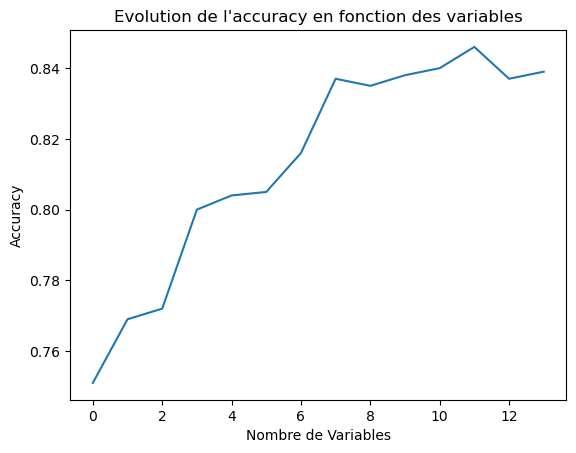

In [21]:
MLP = MLPClassifier(hidden_layer_sizes=(40, 20))
scores=np.zeros(scaled_X_train.shape[1]+1)
for f in np.arange(0, scaled_X_train.shape[1]+1):
    X1_f = scaled_X_train[:,sorted_idx[:f+1]]
    X2_f = scaled_X_test [:,sorted_idx[:f+1]]
    MLP.fit(X1_f,y_train)
    YMLP=MLP.predict(X2_f) 
    scores[f]=np.round(precision_score(y_test,YMLP),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de la precision en fonction des variables")
plt.show()

<h3>Le nombre de variable à prendre est de 11</h3>

<h3> Paramétrage du modèle MLP avec GridSearch en utilisant la mesure (precision + accuracy) / 2 </h3>

In [23]:
from sklearn.metrics import make_scorer
def custom_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (accuracy + precision) / 2

custom_scorer = make_scorer(custom_metrics)

In [24]:
from sklearn.model_selection import GridSearchCV
mlp_GSCV = MLPClassifier()

param = {
    'hidden_layer_sizes': [(40, 20), (50,), (100,), (100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lfbgs', 'sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator = mlp_GSCV, param_grid = param, scoring = custom_scorer)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(40, 20), (50,), (100,),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['lfbgs', 'sgd', 'adam']},
             scoring=make_scorer(custom_metrics, response_method='predict'))

<h3>Meilleurs paramètres à prendre en compte pour notre classifieur MLP.</h3>

In [64]:
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure performance : {:.4f}".format(grid_search.best_score_))

Meilleurs paramètres : {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (50,), 'classifier__learning_rate_init': 0.01, 'classifier__solver': 'sgd'}
Meilleure performance : 0.7988


<h3>Pipeline</h3>

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pickle

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(k=12)),  
    ('classifier', MLPClassifier())
])

# Définition des paramètres pour le GridSearch
param_grid = {
    'classifier__hidden_layer_sizes': [(40, 20), (50,), (100,), (100, 50)],
    'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'classifier__solver': ['lbfgs', 'sgd', 'adam'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1]
}

# Création du GridSearchCV avec le pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=custom_scorer,  # Utilisation du scorer personnalisé défini précédemment
)

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Sauvegarde du meilleur modèle dans un fichier pickle
best_model = grid_search.best_estimator_
with open('credit_scoring_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Code pour charger et utiliser le modèle
def load_and_predict(X_new):
    with open('credit_scoring_model.pkl', 'rb') as file:
        model = pickle.load(file)
    return model.predict(X_new)

In [27]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=8)),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50,),
                               learning_rate_init=0.01, solver='sgd'))])

<h3>Fonction run_classifiers</h3>

In [28]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

def run_classifiers(clfs, X, y):    
    # Évaluation des modèles avec cross-validation
    results = {}
    
    for name, clf in classifiers.items():
        # Calcul de l'accuracy
        accuracy_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        
        # Calcul de l'AUC
        auc_scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    
        # Calcul du custom score
        custom_scores = cross_val_score(clf, X, y, cv=10, scoring = custom_scorer)
        results[name] = {
            'accuracy_mean': accuracy_scores.mean(),
            'accuracy_std': accuracy_scores.std(),
            'auc_mean': auc_scores.mean(),
            'auc_std': auc_scores.std(),
            'custom_mean': custom_scores.mean(),
            'custom_std': custom_scores.std()
        }
    
    # Affichage des résultats
    for name, scores in results.items():
        print(f"\n{name}:")
        print(f"Accuracy: {scores['accuracy_mean']:.3f} (+/- {scores['accuracy_std']:.3f})")
        print(f"AUC: {scores['auc_mean']:.3f} (+/- {scores['auc_std']:.3f})")
        print(f"Custom Scores: {scores['custom_mean']:.3f} (+/- {scores['custom_std']:.3f})")    

<h3>Comparaison de différents classifieurs sur la base de Accuracy, AUC et (precision+accuracy)/2</h3>

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

classifiers = {
    'CART': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), random_state=42),
    'Bagging': BaggingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=300, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
}

run_classifiers(classifiers, X, y)
print("-" * 20)
print("AVEC X_SCALED")
print("-" * 20)
run_classifiers(classifiers, X_scaled, y)


CART:
Accuracy: 0.714 (+/- 0.027)
AUC: 0.648 (+/- 0.030)
Custom Scores: 0.760 (+/- 0.021)

KNN:
Accuracy: 0.714 (+/- 0.023)
AUC: 0.664 (+/- 0.031)
Custom Scores: 0.740 (+/- 0.016)

MLP:
Accuracy: 0.715 (+/- 0.054)
AUC: 0.720 (+/- 0.049)
Custom Scores: 0.759 (+/- 0.032)

Bagging:
Accuracy: 0.781 (+/- 0.017)
AUC: 0.822 (+/- 0.020)
Custom Scores: 0.801 (+/- 0.015)

AdaBoost:
Accuracy: 0.791 (+/- 0.013)
AUC: 0.825 (+/- 0.023)
Custom Scores: 0.808 (+/- 0.011)

RandomForest:
Accuracy: 0.790 (+/- 0.018)
AUC: 0.832 (+/- 0.021)
Custom Scores: 0.804 (+/- 0.016)
--------------------
AVEC X_SCALED
--------------------

CART:
Accuracy: 0.714 (+/- 0.026)
AUC: 0.648 (+/- 0.029)
Custom Scores: 0.760 (+/- 0.021)

KNN:
Accuracy: 0.761 (+/- 0.013)
AUC: 0.767 (+/- 0.021)
Custom Scores: 0.787 (+/- 0.011)

MLP:
Accuracy: 0.792 (+/- 0.017)
AUC: 0.840 (+/- 0.014)
Custom Scores: 0.810 (+/- 0.015)

Bagging:
Accuracy: 0.781 (+/- 0.017)
AUC: 0.822 (+/- 0.020)
Custom Scores: 0.802 (+/- 0.015)

AdaBoost:
Accuracy:

<h3>MLP et AdaBoost montre les meilleurs métriques ainsi qu'une faible variations (écart-type faible), on choisira donc MLP et on utilisera les paramètres de tunings déterminé précédemment.</h3>

<h1>Apprentissage supervisé : Données hétérogènes</h1>

In [30]:
dataset = pd.read_csv("credit.data", sep = "\t", header = None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
684,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
685,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
686,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [31]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [32]:
numeric_columns = [1, 2, 7, 13, 14, 15]
sub_dataset = dataset[numeric_columns]
sub_dataset = sub_dataset.replace('?', np.nan)
sub_dataset = sub_dataset.dropna()

sub_X = sub_dataset.iloc[:, :-1].astype(float)
sub_Y = sub_dataset.iloc[:, -1]

In [33]:
print("Taille de l'échantillon:", sub_X.shape)
print("\nDistribution des classes:")
print(sub_Y.value_counts())

Taille de l'échantillon: (666, 5)

Distribution des classes:
15
-    367
+    299
Name: count, dtype: int64


<h3> La distribution de l'échantillon est assez déséquilibrée, on affiche plus de cas (-) que de cas (+)</h3>

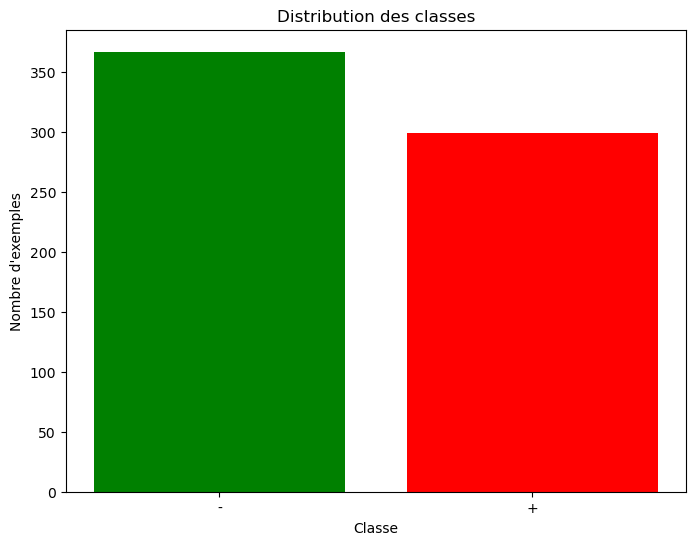

In [34]:
plt.figure(figsize=(8, 6))
values_count = sub_Y.value_counts()
plt.bar(values_count.index, values_count.values, 
        color=['green', 'red'])

plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'exemples')
plt.show()

<h3>Transformation de la variable target en valeur binaire (0 et 1)</h3>

In [35]:
y_binary = (y == '+').astype(int)

<h3>On prenant en compte les classifieurs ci-dessous et la métrique AUC</h3>
<p>RandomForest et Bagging affiche les meilleurs score avec respectivement un AUC de 0.811 et 0.799 et ce pour le dataset où on a enlever les valeurs NaN (précédemment '?') </p>

In [36]:
classifiers = {
    'CART': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), random_state=42),
    'Bagging': BaggingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=300, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
}

run_classifiers(classifiers, sub_X, sub_Y)


CART:
Accuracy: 0.646 (+/- 0.042)
AUC: 0.644 (+/- 0.042)
Custom Scores: nan (+/- nan)

KNN:
Accuracy: 0.661 (+/- 0.069)
AUC: 0.716 (+/- 0.052)
Custom Scores: nan (+/- nan)

MLP:
Accuracy: 0.651 (+/- 0.085)
AUC: 0.679 (+/- 0.099)
Custom Scores: nan (+/- nan)

Bagging:
Accuracy: 0.724 (+/- 0.049)
AUC: 0.799 (+/- 0.051)
Custom Scores: nan (+/- nan)

AdaBoost:
Accuracy: 0.689 (+/- 0.053)
AUC: 0.736 (+/- 0.064)
Custom Scores: nan (+/- nan)

RandomForest:
Accuracy: 0.739 (+/- 0.039)
AUC: 0.811 (+/- 0.057)
Custom Scores: nan (+/- nan)


<h3>Après normalisation on remarque une légère amélioration mais les scores restent tout de même assez bas pour le reste des classifieurs</h3>

In [37]:
scaler = StandardScaler()
scaled_sub_X = scaler.fit_transform(sub_X)

run_classifiers(classifiers, scaled_sub_X, sub_Y)


CART:
Accuracy: 0.649 (+/- 0.044)
AUC: 0.647 (+/- 0.044)
Custom Scores: nan (+/- nan)

KNN:
Accuracy: 0.685 (+/- 0.031)
AUC: 0.751 (+/- 0.047)
Custom Scores: nan (+/- nan)

MLP:
Accuracy: 0.722 (+/- 0.058)
AUC: 0.798 (+/- 0.057)
Custom Scores: nan (+/- nan)

Bagging:
Accuracy: 0.725 (+/- 0.053)
AUC: 0.800 (+/- 0.050)
Custom Scores: nan (+/- nan)

AdaBoost:
Accuracy: 0.689 (+/- 0.053)
AUC: 0.736 (+/- 0.064)
Custom Scores: nan (+/- nan)

RandomForest:
Accuracy: 0.736 (+/- 0.042)
AUC: 0.811 (+/- 0.056)
Custom Scores: nan (+/- nan)


# Traitement des valeurs manquantes

In [38]:
import numpy as np
from sklearn.impute import SimpleImputer 

col_num = [1, 2, 7, 13, 14]  # colonnes numériques
col_cat = [0, 3, 4, 5, 6, 8, 9, 10, 11, 12]  # colonnes catégorielles


# Encoder chaque colonne catégorielle
X_cat = np.copy(X.iloc[:, col_cat].values)
for col_id in range(len(col_cat)):
    # Remplacer les '?' par une nouvelle catégorie
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx

# Imputer les valeurs manquantes pour les variables catégorielles
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat = imp_cat.fit_transform(X_cat)

# 2. Traitement des variables numériques
X_num = np.copy(X.iloc[:, col_num].values)
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)

# Imputer les valeurs manquantes pour les variables numériques
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

# 3. Combiner les données numériques et catégorielles
X_imputed = np.zeros((X.shape[0], len(col_num) + len(col_cat)))
X_imputed[:, :len(col_num)] = X_num
X_imputed[:, len(col_num):] = X_cat

print("Shape des données après imputation:", X_imputed.shape)

Shape des données après imputation: (688, 15)


# On remarque une nette amélioration après application de Impute sur les classifieurs et surtout sur les classifieurs qui précédemment affiché déjà de bons résultats.

In [39]:
run_classifiers(classifiers, X_imputed, y)


CART:
Accuracy: 0.708 (+/- 0.055)
AUC: 0.701 (+/- 0.056)
Custom Scores: nan (+/- nan)

KNN:
Accuracy: 0.699 (+/- 0.053)
AUC: 0.725 (+/- 0.040)
Custom Scores: nan (+/- nan)

MLP:
Accuracy: 0.740 (+/- 0.057)
AUC: 0.762 (+/- 0.043)
Custom Scores: nan (+/- nan)

Bagging:
Accuracy: 0.781 (+/- 0.064)
AUC: 0.842 (+/- 0.070)
Custom Scores: nan (+/- nan)

AdaBoost:
Accuracy: 0.775 (+/- 0.053)
AUC: 0.824 (+/- 0.071)
Custom Scores: nan (+/- nan)

RandomForest:
Accuracy: 0.781 (+/- 0.069)
AUC: 0.859 (+/- 0.066)
Custom Scores: nan (+/- nan)


# Traitement des variables catégorielles
<p> On a aussi regroupé le dataset après traitement sur les valeurs manquantes et les valeurs catégorielles</p>

In [40]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X_final = np.hstack((X_num_scaled, X_cat_bin))

In [41]:
run_classifiers(classifiers, X_final, y_binary)


CART:
Accuracy: 0.689 (+/- 0.066)
AUC: 0.684 (+/- 0.066)
Custom Scores: 0.671 (+/- 0.072)

KNN:
Accuracy: 0.716 (+/- 0.033)
AUC: 0.752 (+/- 0.069)
Custom Scores: 0.745 (+/- 0.052)

MLP:
Accuracy: 0.773 (+/- 0.059)
AUC: 0.831 (+/- 0.080)
Custom Scores: 0.784 (+/- 0.066)

Bagging:
Accuracy: 0.766 (+/- 0.068)
AUC: 0.838 (+/- 0.069)
Custom Scores: 0.767 (+/- 0.081)

AdaBoost:
Accuracy: 0.759 (+/- 0.067)
AUC: 0.827 (+/- 0.072)
Custom Scores: 0.751 (+/- 0.074)

RandomForest:
Accuracy: 0.782 (+/- 0.051)
AUC: 0.849 (+/- 0.069)
Custom Scores: 0.790 (+/- 0.064)
